In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import random
import time
%matplotlib inline

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Fin_Data.csv")


In [ ]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [ ]:
#Feature engineering

dataset = dataset.drop(columns = ['months_employed'])
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y*12))
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()
dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

In [ ]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


In [ ]:
dataset = pd.get_dummies(dataset)
dataset.columns
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

In [ ]:
dataset.head()

,entry_id,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
0,7629673,40,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30,1,0,0
1,3560428,61,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86,0,0,1
2,6934997,23,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19,0,0,1
3,5682812,40,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86,1,0,0
4,5335819,33,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98,0,0,0


In [ ]:
#removing extra columns
response = dataset["e_signed"]
users = dataset['entry_id']
dataset = dataset.drop(columns = ["e_signed", "entry_id"])

In [ ]:
#splitting into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,response,random_state = 0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [ ]:
#model building
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#predicting test set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
#please go through different forms of penalties to better understand what is lasso
print(results)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.564664   0.575574  0.711723  0.636448


In [ ]:
# SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.564664   0.575574  0.711723  0.636448
1         SVM (Linear)  0.570695   0.577843  0.735503  0.647210


In [ ]:
# SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.564664   0.575574  0.711723  0.636448
1         SVM (Linear)  0.570695   0.577843  0.735503  0.647210
2            SVM (RBF)  0.590797   0.602318  0.693784  0.644824


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (KNN)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.564664   0.575574  0.711723  0.636448
1         SVM (Linear)  0.570695   0.577843  0.735503  0.647210
2            SVM (RBF)  0.590797   0.602318  0.693784  0.644824
3            SVM (KNN)  0.561090   0.585174  0.619107  0.601662


In [ ]:
#NB
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['NB', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.564664   0.575574  0.711723  0.636448
1         SVM (Linear)  0.570695   0.577843  0.735503  0.647210
2            SVM (RBF)  0.590797   0.602318  0.693784  0.644824
3            SVM (KNN)  0.561090   0.585174  0.619107  0.601662
4                   NB  0.560197   0.575140  0.683354  0.624595


In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest ENTROPY (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                           Model  Accuracy  Precision    Recall  F1 Score
0            Logistic Regression  0.564664   0.575574  0.711723  0.636448
1                   SVM (Linear)  0.570695   0.577843  0.735503  0.647210
2                      SVM (RBF)  0.590797   0.602318  0.693784  0.644824
3                      SVM (KNN)  0.561090   0.585174  0.619107  0.601662
4                             NB  0.560197   0.575140  0.683354  0.624595
5  Random Forest ENTROPY (n=100)  0.621175   0.637182  0.679182  0.657512


In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest GINI (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                           Model  Accuracy  Precision    Recall  F1 Score
0            Logistic Regression  0.564664   0.575574  0.711723  0.636448
1                   SVM (Linear)  0.570695   0.577843  0.735503  0.647210
2                      SVM (RBF)  0.590797   0.602318  0.693784  0.644824
3                      SVM (KNN)  0.561090   0.585174  0.619107  0.601662
4                             NB  0.560197   0.575140  0.683354  0.624595
5  Random Forest ENTROPY (n=100)  0.621175   0.637182  0.679182  0.657512
6     Random Forest GINI (n=100)  0.613357   0.632248  0.664164  0.647813


In [ ]:
# K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))


Random Forest Classifier Accuracy: 0.63 (+/- 0.02)


In [ ]:
# Round 1: Entropy
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}
#we are checking in the different variation of numerical values
#in the parameters of random forest classifier

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,#from k-fold validation
                           n_jobs = -1)#to use the entire core of the machine

t0 = time.time()#just to check how much time it takes to excute the program
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

# Round 2: Entropy
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

print(results)

Took 4488.72 seconds
Took 1474.34 seconds
                                   Model  Accuracy  ...    Recall  F1 Score
0                    Logistic Regression  0.564664  ...  0.711723  0.636448
1                           SVM (Linear)  0.570695  ...  0.735503  0.647210
2                              SVM (RBF)  0.590797  ...  0.693784  0.644824
3                              SVM (KNN)  0.561090  ...  0.619107  0.601662
4                                     NB  0.560197  ...  0.683354  0.624595
5          Random Forest ENTROPY (n=100)  0.621175  ...  0.679182  0.657512
6             Random Forest GINI (n=100)  0.613357  ...  0.664164  0.647813
7  Random Forest (n=100, GSx2 + Entropy)  0.626759  ...  0.691698  0.664929
8  Random Forest (n=100, GSx2 + Entropy)  0.626759  ...  0.691698  0.664929

[9 rows x 5 columns]


In [ ]:
# Round 1: Gini
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 2710.68 seconds


(0.6333106739531256,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

In [ ]:
# Round 2: Gini
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

print(results)

Took 1319.25 seconds
                                   Model  Accuracy  ...    Recall  F1 Score
0                    Logistic Regression  0.564664  ...  0.711723  0.636448
1                           SVM (Linear)  0.570695  ...  0.735503  0.647210
2                              SVM (RBF)  0.590797  ...  0.693784  0.644824
3                              SVM (KNN)  0.561090  ...  0.619107  0.601662
4                                     NB  0.560197  ...  0.683354  0.624595
5          Random Forest ENTROPY (n=100)  0.621175  ...  0.679182  0.657512
6             Random Forest GINI (n=100)  0.613357  ...  0.664164  0.647813
7  Random Forest (n=100, GSx2 + Entropy)  0.626759  ...  0.691698  0.664929
8  Random Forest (n=100, GSx2 + Entropy)  0.626759  ...  0.691698  0.664929
9     Random Forest (n=100, GSx2 + Gini)  0.628323  ...  0.698790  0.668129

[10 rows x 5 columns]


Test Data Accuracy: 0.6283


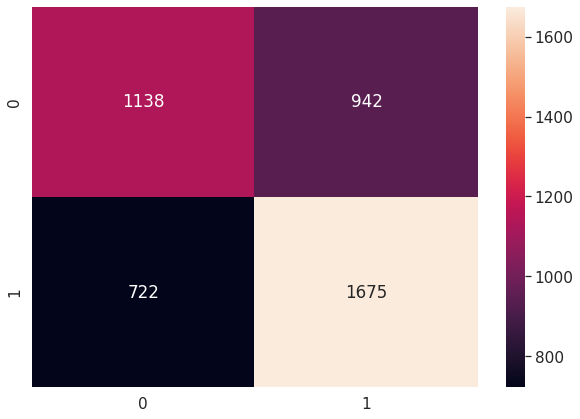

In [ ]:
# EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


In [ ]:
# Formatting Final Results

final_results = pd.concat([y_test, users], axis = 1).dropna()
#drop na is just for safe guard not required for thia dataset
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]
print(final_results)

       entry_id  e_signed  predictions
8       6493191       1.0            0
9       8908605       1.0            1
12      6889184       1.0            0
16      9375601       0.0            1
18      8515555       1.0            1
...         ...       ...          ...
17890   3605941       0.0            1
17897   4078915       1.0            1
17899   6799343       1.0            0
17901   1807355       0.0            1
17907   1498559       1.0            0

[4477 rows x 3 columns]
